In [1]:
import pandas as pd
import re

###Process results file

In [ ]:
#Function for extracting floats
def extract_floats(lst):
    # Remove non-numeric characters (except for commas, dots, and minus signs) from the string
    cleaned_list = re.findall(r"-?\d+\.?\d*", str(lst))
    # Convert to float and take only the first 4 elements if more are present
    return [min(float(x), 0.5) if float(x) > 1 else float(x) for x in cleaned_list[:4]]

In [29]:
#Load results, name columns, add 'conf' column
oneshot_df=pd.read_csv('logiqa_partial_result.csv')
oneshot_conf_df=pd.read_csv('logiqa_trainset_results_conf.csv')
oneshot_df.columns=['id','selected_answer','conf']
oneshot_conf_df.columns=['id','conf_list']
oneshot_df['conf'] = oneshot_df['conf'].str.replace(r'[^0-9.]', '', regex=True).astype(float)

In [10]:
#oneshot_conf_df['conf_list']

,conf_list
0,"[0.1, 0.2, 0.9, 0.3]"
1,"[0.1, 0.7, 0.05, 0.15]"
2,"['0.2', '0.3', '0.4', '0.1']"
3,"[0.4, 0.3, 0.2, 0.1]"
4,"[0.3, 0.2, 0.4, 0.1]"
...,...
2427,"[0.9, 0.8, 0.3, 0.4]"
2428,"[0.7, 0.6, 0.5, 0.4]"
2429,"[0.1, 0.2, 0.4, 0.3]"
2430,"[0.7, 0.6, 0.5, 0.8]"


In [11]:
# Extract floats and create new columns
oneshot_conf_df[['conf1', 'conf2', 'conf3', 'conf4']] = pd.DataFrame(oneshot_conf_df['conf_list'].apply(extract_floats).to_list(), index=oneshot_conf_df.index)

# Merge the two dfs
merged_df=oneshot_df.merge(oneshot_conf_df,on='id')

# Create 'absolute_conf' as the max of the individual confidence amounts
merged_df['absolute_conf'] = merged_df[['conf1', 'conf2', 'conf3', 'conf4']].max(axis=1)

# Calculate the sum of conf1, conf2, conf3, and conf4
merged_df['conf_sum'] = merged_df[['conf1', 'conf2', 'conf3', 'conf4']].sum(axis=1)

# Calculate relative_conf as absolute_conf / conf_sum
merged_df['relative_conf'] = merged_df['absolute_conf'] / merged_df['conf_sum']

# Drop the temporary conf_sum column if not needed
merged_df.drop(columns=['conf_sum'], inplace=True)


In [14]:
#merged_df#.plot(x='absolute_conf',y='conf',kind='scatter')


,id,selected_answer,conf,conf_list,conf1,conf2,conf3,conf4,absolute_conf,relative_conf
0,0,C,0.90,"[0.1, 0.2, 0.9, 0.3]",0.1,0.2,0.90,0.30,0.9,0.600000
1,1,B,0.90,"[0.1, 0.7, 0.05, 0.15]",0.1,0.7,0.05,0.15,0.7,0.700000
2,2,C,0.25,"['0.2', '0.3', '0.4', '0.1']",0.2,0.3,0.40,0.10,0.4,0.400000
3,3,C,0.25,"[0.4, 0.3, 0.2, 0.1]",0.4,0.3,0.20,0.10,0.4,0.400000
4,4,C,0.10,"[0.3, 0.2, 0.4, 0.1]",0.3,0.2,0.40,0.10,0.4,0.400000
...,...,...,...,...,...,...,...,...,...,...
1467,1467,C,0.75,"[0.9, 0.8, 0.7, 0.6]",0.9,0.8,0.70,0.60,0.9,0.300000
1468,1468,C,0.90,"[0.9, 0.9, 0.1, 0.8]",0.9,0.9,0.10,0.80,0.9,0.333333
1469,1469,B,0.90,"[0.7, 0.9, 0.4, 0.3]",0.7,0.9,0.40,0.30,0.9,0.391304
1470,1470,B,0.90,"[0.7, 0.9, 0.8, 0.85]",0.7,0.9,0.80,0.85,0.9,0.276923


In [16]:
gt=pd.read_csv('train_df.csv')

In [17]:
merged_df['ground_truth']=gt[gt['ds_name']=='logiqa'].iloc[merged_df.index]['correct_answer'].values

In [18]:
answer_map = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
merged_df['selected_answer_mapped'] = merged_df['selected_answer'].map(answer_map)

# Creating iscorrect flag (1 if selected answer matches ground truth, otherwise 0)
merged_df['iscorrect'] = (merged_df['selected_answer_mapped'] == merged_df['ground_truth']).astype(int)

# Dropping the temporary mapped column if not needed
merged_df.drop(columns=['selected_answer_mapped'], inplace=True)
merged_df

,id,selected_answer,conf,conf_list,conf1,conf2,conf3,conf4,absolute_conf,relative_conf,ground_truth,iscorrect
0,0,C,0.90,"[0.1, 0.2, 0.9, 0.3]",0.1,0.2,0.90,0.30,0.9,0.600000,2,1
1,1,B,0.90,"[0.1, 0.7, 0.05, 0.15]",0.1,0.7,0.05,0.15,0.7,0.700000,0,0
2,2,C,0.25,"['0.2', '0.3', '0.4', '0.1']",0.2,0.3,0.40,0.10,0.4,0.400000,1,0
3,3,C,0.25,"[0.4, 0.3, 0.2, 0.1]",0.4,0.3,0.20,0.10,0.4,0.400000,0,0
4,4,C,0.10,"[0.3, 0.2, 0.4, 0.1]",0.3,0.2,0.40,0.10,0.4,0.400000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1467,1467,C,0.75,"[0.9, 0.8, 0.7, 0.6]",0.9,0.8,0.70,0.60,0.9,0.300000,3,0
1468,1468,C,0.90,"[0.9, 0.9, 0.1, 0.8]",0.9,0.9,0.10,0.80,0.9,0.333333,2,1
1469,1469,B,0.90,"[0.7, 0.9, 0.4, 0.3]",0.7,0.9,0.40,0.30,0.9,0.391304,1,1
1470,1470,B,0.90,"[0.7, 0.9, 0.8, 0.85]",0.7,0.9,0.80,0.85,0.9,0.276923,1,1


In [19]:
merged_df=merged_df.fillna(0)

In [22]:
merged_df.to_csv('result_expt.csv',index=None)

In [23]:
merged_df

,id,selected_answer,conf,conf_list,conf1,conf2,conf3,conf4,absolute_conf,relative_conf,ground_truth,iscorrect
0,0,C,0.90,"[0.1, 0.2, 0.9, 0.3]",0.1,0.2,0.90,0.30,0.9,0.600000,2,1
1,1,B,0.90,"[0.1, 0.7, 0.05, 0.15]",0.1,0.7,0.05,0.15,0.7,0.700000,0,0
2,2,C,0.25,"['0.2', '0.3', '0.4', '0.1']",0.2,0.3,0.40,0.10,0.4,0.400000,1,0
3,3,C,0.25,"[0.4, 0.3, 0.2, 0.1]",0.4,0.3,0.20,0.10,0.4,0.400000,0,0
4,4,C,0.10,"[0.3, 0.2, 0.4, 0.1]",0.3,0.2,0.40,0.10,0.4,0.400000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1467,1467,C,0.75,"[0.9, 0.8, 0.7, 0.6]",0.9,0.8,0.70,0.60,0.9,0.300000,3,0
1468,1468,C,0.90,"[0.9, 0.9, 0.1, 0.8]",0.9,0.9,0.10,0.80,0.9,0.333333,2,1
1469,1469,B,0.90,"[0.7, 0.9, 0.4, 0.3]",0.7,0.9,0.40,0.30,0.9,0.391304,1,1
1470,1470,B,0.90,"[0.7, 0.9, 0.8, 0.85]",0.7,0.9,0.80,0.85,0.9,0.276923,1,1


###Plot histogram

<Axes: >

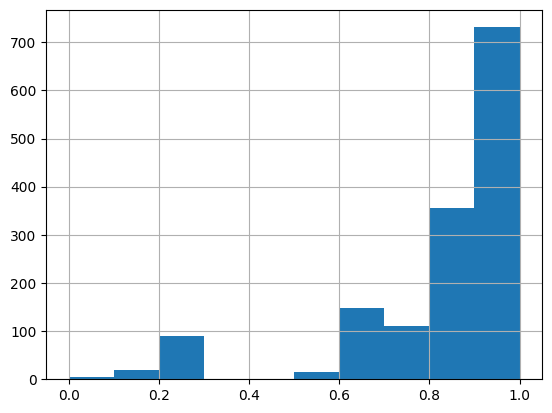

In [6]:
oneshot_df['conf'].hist()

###Reliability Diagrams

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = merged_df.copy()

# Define function to calculate bin accuracy and confidence
def reliability_curve(confidence, actual, bins=10):
    bin_edges = np.linspace(0, 1, bins + 1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
    accuracy = np.zeros(bins)
    avg_confidence = np.zeros(bins)

    for i in range(bins):
        in_bin = (confidence >= bin_edges[i]) & (confidence < bin_edges[i + 1])
        if np.sum(in_bin) > 0:
            accuracy[i] = np.mean(actual[in_bin])
            avg_confidence[i] = np.mean(confidence[in_bin])
        else:
            accuracy[i] = np.nan  # Handle empty bins

    return bin_centers, avg_confidence, accuracy


# Generate reliability curves for each pair of confidence columns
# Requires very specific format for input file
def plot_reliability_curves(df):
    pairs = [('conf', 'absolute_conf'), ('conf', 'relative_conf'), ('absolute_conf', 'relative_conf')]
    fig, axes = plt.subplots(1, len(pairs), figsize=(18, 6))

    for ax, (conf1, conf2) in zip(axes, pairs):
        for conf_column in [conf1, conf2]:
            bin_centers, avg_conf, accuracy = reliability_curve(df[conf_column], df['iscorrect'])
            ax.plot(avg_conf, accuracy, label=f'Reliability for {conf_column}')

        # Diagonal line for perfect calibration
        ax.plot([0, 1], [0, 1], 'k--', label='Perfect Calibration')
        ax.set_xlabel('Confidence')
        ax.set_ylabel('Accuracy')
        ax.set_title(f'Reliability Diagram: {conf1} vs {conf2}')
        ax.legend()

    plt.tight_layout()
    plt.show()



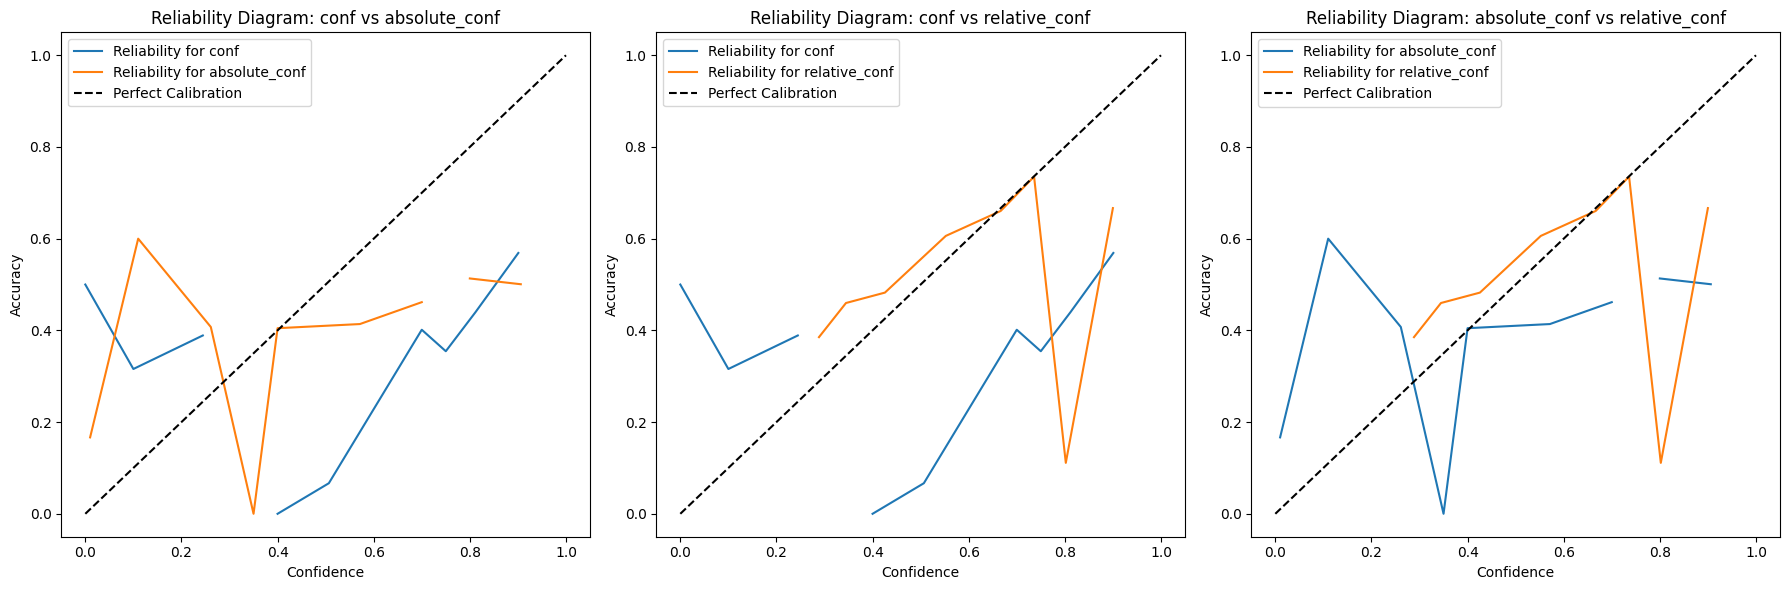

In [28]:
df = merged_df.copy()
plot_reliability_curves(df)

###ECE

In [31]:
import numpy as np

#Code from Chat-GPT - to be validated
def calculate_ece(predictions, labels, num_bins=10):
    """
    Calculate Expected Calibration Error (ECE).

    Parameters:
        predictions (np.array): Predicted probabilities for the positive class (e.g., class 1) with shape (n_samples,).
        labels (np.array): True labels (0 or 1) with shape (n_samples,).
        num_bins (int): Number of bins to use for calibration (default: 10).

    Returns:
        float: Expected Calibration Error (ECE).
    """

    # Ensure predictions and labels are numpy arrays
    predictions = np.array(predictions)
    labels = np.array(labels)

    # Bin edges for confidence bins, from 0 to 1
    bin_edges = np.linspace(0, 1, num_bins + 1)
    ece = 0.0  # initialize the ECE

    # Iterate over each bin
    for i in range(num_bins):
        # Find samples that fall into the current bin
        bin_lower = bin_edges[i]
        bin_upper = bin_edges[i + 1]

        # Get indices of predictions that fall into the current bin
        in_bin = (predictions >= bin_lower) & (predictions < bin_upper)
        bin_size = np.sum(in_bin)

        # Skip bins with no samples
        if bin_size > 0:
            # Calculate the accuracy and confidence of the current bin
            accuracy = np.mean(labels[in_bin] == 1)
            confidence = np.mean(predictions[in_bin])

            # Update ECE with weighted difference
            ece += (bin_size / len(predictions)) * abs(confidence - accuracy)

    return ece


In [39]:
#Calculate ECE - using absolute confidence and 'iscorrect' as binary yes/no
ece = calculate_ece(df['absolute_conf'], df['iscorrect'], num_bins=5)
print(f"Expected Calibration Error (ECE): {ece}")

Expected Calibration Error (ECE): 0.2799524456521739


###Brier Score

In [41]:
from sklearn.metrics import brier_score_loss

#TODO: Validate logic and calculate for the different/desired confidence measures

#Brier Score with absolute confidence
brier_score = brier_score_loss(df['iscorrect'],df['absolute_conf'])
print(f"Brier Score: {brier_score}")

Brier Score: 0.3832439538043478


###F1 Score

In [44]:
from sklearn.metrics import f1_score

#TODO: Format file into consistent labels for prediction and ground truth

f1_score_macro = f1_score(y_true, y_pred, average='macro')
f1_score_weighted = f1_score(y_true, y_pred, average='weighted')

print(f"F1 Score (Macro) {f1_score_macro}")
print(f"F1 Score (Weighted) {f1_score_weighted}")

F1 Score (Macro) 0.26666666666666666
F1 Score (Micro) 0.3333333333333333
F1 Score (Weighted) 0.26666666666666666
